In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
import seaborn as sns
import sklearn.metrics as sm

import matplotlib.pyplot as plt
###### Some extra modules for other type of classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE


<!-- Age: Represents the age of the individuals in the dataset.
Job: Describes the occupation or type of job of the individuals.
Marital: Indicates the marital status of the individuals, such as married, single, divorced, or unknown.
Education: Refers to the educational level of the individuals, including categories like high school, university degree, or unknown.
Default: Denotes whether the individuals have credit in default or not.
Balance: Represents the average yearly balance in euros for the individuals.
Housing: Indicates whether the individuals have a housing loan or not.
Loan: Specifies whether the individuals have a personal loan or not.
Contact: Refers to the communication type used to contact the individuals, such as cellular or telephone.
Day_of_week: Indicates the last contact day of the week.
Month: Represents the last contact month of the year.
Duration: Refers to the duration of the last contact in seconds.
Campaign: Represents the number of contacts performed during the current campaign for each individual.
Pdays: Indicates the number of days that passed by after the individual was last contacted from a previous campaign.
Previous: Represents the number of contacts performed before the current campaign for each individual.
Poutcome: Refers to the outcome of the previous marketing campaign for each individual, categorized as failure, nonexistent, or success. -->

### 1. Age: Represents the age of the individuals in the dataset.
### 2. Job: Describes the occupation or type of job of the individuals.
### 3. Marital: Indicates the marital status of the individuals, such as married, single, divorced, or unknown.
### 4. Education: Refers to the educational level of the individuals, including categories like high school, university degree, or unknown.
### 5. Default: Denotes whether the individuals have credit in default or not.
### 6. Balance: Represents the average yearly balance in euros for the individuals.
### 7. Housing: Indicates whether the individuals have a housing loan or not.
### 8. Loan: Specifies whether the individuals have a personal loan or not.
### 9. Contact: Refers to the communication type used to contact the individuals, such as cellular or telephone.
### 10. Day_of_week: Indicates the last contact day of the week.
### 11. Month: Represents the last contact month of the year.
### 12. Duration: Refers to the duration of the last contact in seconds.
### 13. Campaign: Represents the number of contacts performed during the current campaign for each individual.
### 14. Pdays: Indicates the number of days that passed by after the individual was last contacted from a previous campaign.
### 15. Previous: Represents the number of contacts performed before the current campaign for each individual.
### 16. Poutcome: Refers to the outcome of the previous marketing campaign for each individual, categorized as failure, nonexistent, or success.

In [271]:
df=pd.read_csv('bank_data.csv')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [273]:
df.replace('NaN',np.nan,inplace=True)
df.replace('?',np.nan,inplace=True)
df.replace(' ',np.nan,inplace=True)
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [274]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [275]:
df.drop(columns=['contact','poutcome'],axis=1,inplace=True)

In [276]:
df.dropna(inplace=True)

In [277]:
df.shape

(45211, 15)

In [278]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


# Numerical Features

## Age

In [8]:
df['age'].isna().value_counts()

age
False    45211
Name: count, dtype: int64

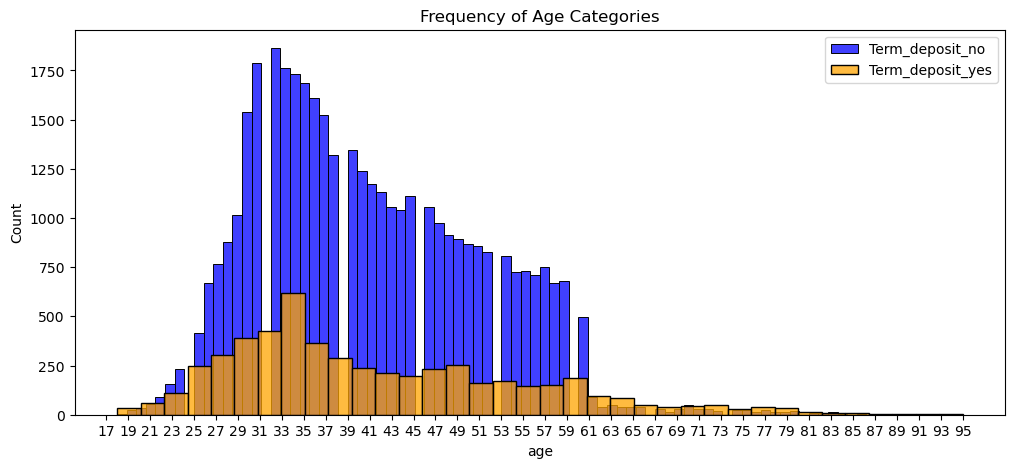

In [107]:

plt.figure(figsize=(12,5))

sns.histplot(df[df['y'] == 'no']['age'], color='blue', label='Term_deposit_no')

sns.histplot(df[df['y'] == 'yes']['age'], color='orange', label='Term_deposit_yes')
plt.xticks(np.arange(17, 97, step=2))
plt.title("Frequency of Age Categories")
plt.legend()
plt.show()

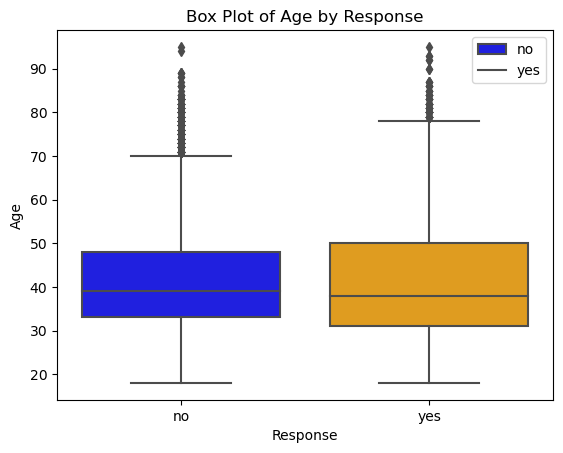

In [10]:
sns.boxplot(x='y', y='age', data=df,palette=['blue','orange'])

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Box Plot of Age by Response')
plt.legend(labels=['no','yes'])
# Displaying the plot
plt.show()

## Balance

Text(0, 0.5, 'Count')

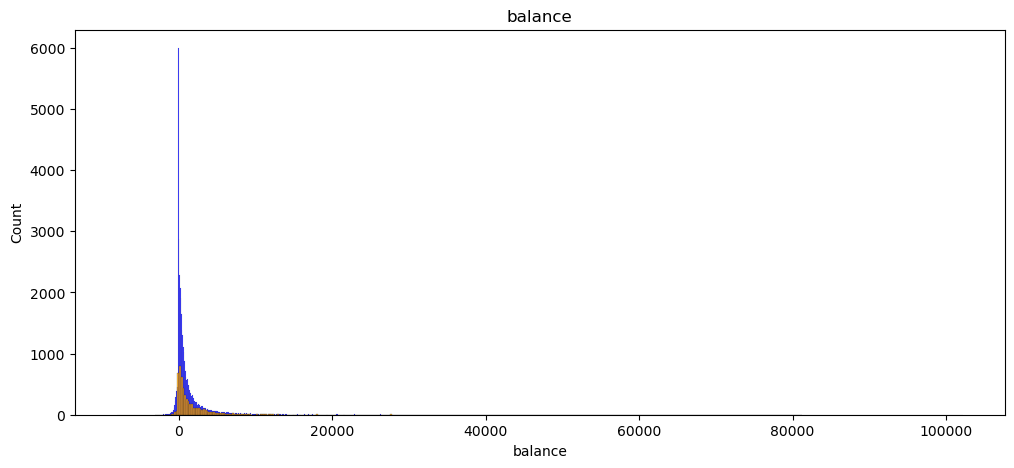

In [109]:
plt.figure(figsize=[12, 5])
sns.histplot(data=df[df['y'] == 'no'], x='balance', color='blue')
sns.histplot(data=df[df['y'] == 'yes'], x='balance', color='orange')
plt.title("Frequency of Average Yearly Balance")

plt.title('balance')
plt.ylabel('Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


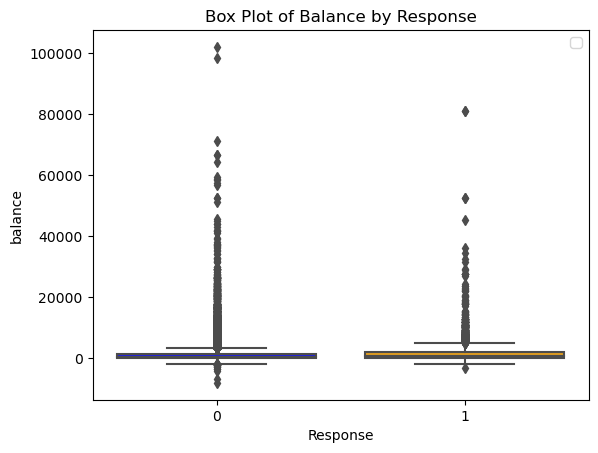

In [173]:
sns.boxplot(x='y', y='balance', data=df,palette=['blue','orange'])

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('balance')
plt.title("Box Plot of Balance by Response")
plt.legend()
# Displaying the plot
plt.show()

## Day:


Text(0, 0.5, 'Count')

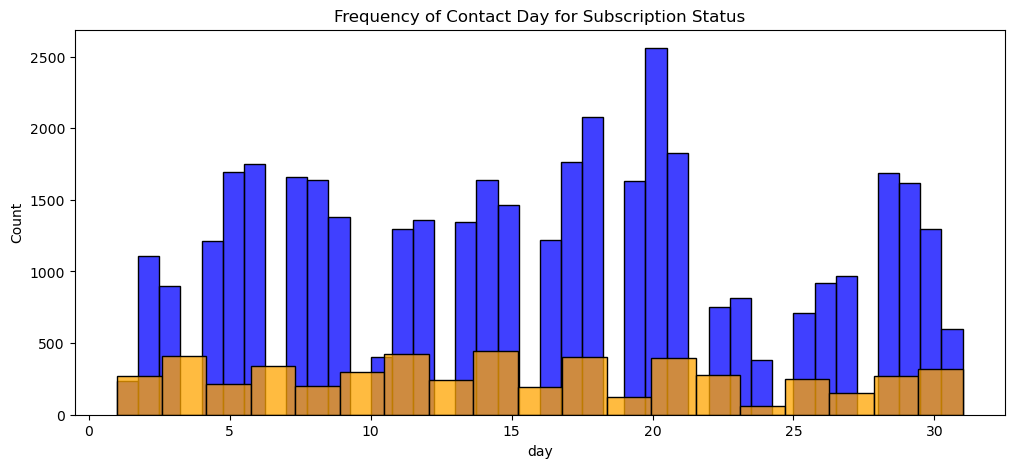

In [90]:
plt.figure(figsize=[12, 5])
sns.histplot(data=df[df['y'] == 'no'], x='day', color='blue')
sns.histplot(data=df[df['y'] == 'yes'], x='day', color='orange')

plt.title("Frequency of Contact Day for Subscription Status")
plt.xlabel('day')
plt.ylabel('Count')

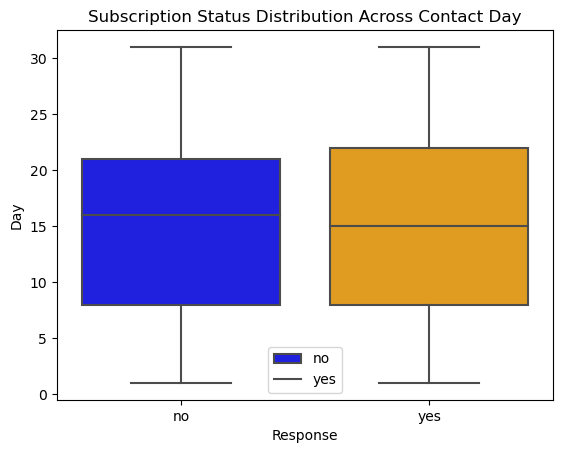

In [92]:
sns.boxplot(x='y', y='day', data=df,palette=['blue','orange'])

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('Day')
plt.title("Subscription Status Distribution Across Contact Day")
plt.legend(labels=['no','yes'])
# Displaying the plot
plt.show()

## Campaign 

In [16]:
df[df['y'] == 'yes']['campaign'].mean()

2.1410474569861977

Text(0, 0.5, 'Count')

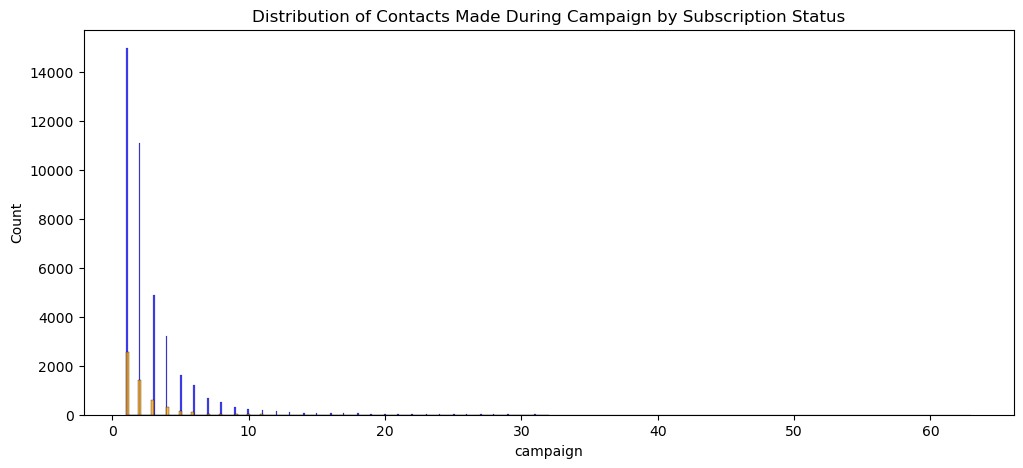

In [94]:
plt.figure(figsize=[12, 5])
sns.histplot(data=df[df['y'] == 'no'], x='campaign', color='blue')
sns.histplot(data=df[df['y'] == 'yes'], x='campaign', color='orange')

plt.title("Distribution of Contacts Made During Campaign by Subscription Status")
plt.xlabel('campaign')
plt.ylabel('Count')

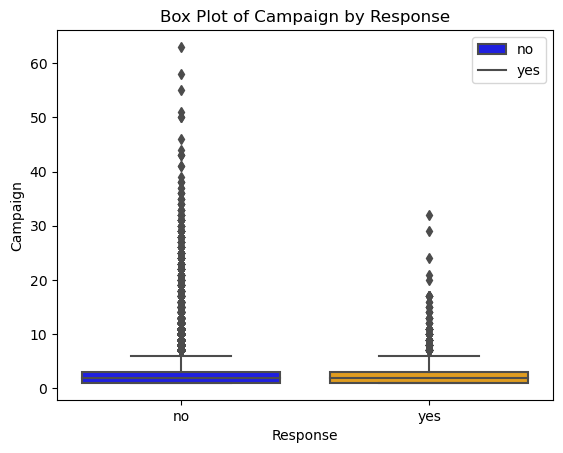

In [95]:
sns.boxplot(x='y', y='campaign', data=df,palette=['blue','orange'])

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('Campaign')
plt.title("Box Plot of Campaign by Response")
plt.legend(labels=['no','yes'])
# Displaying the plot
plt.show()

## pdays:

Text(0, 0.5, 'Count')

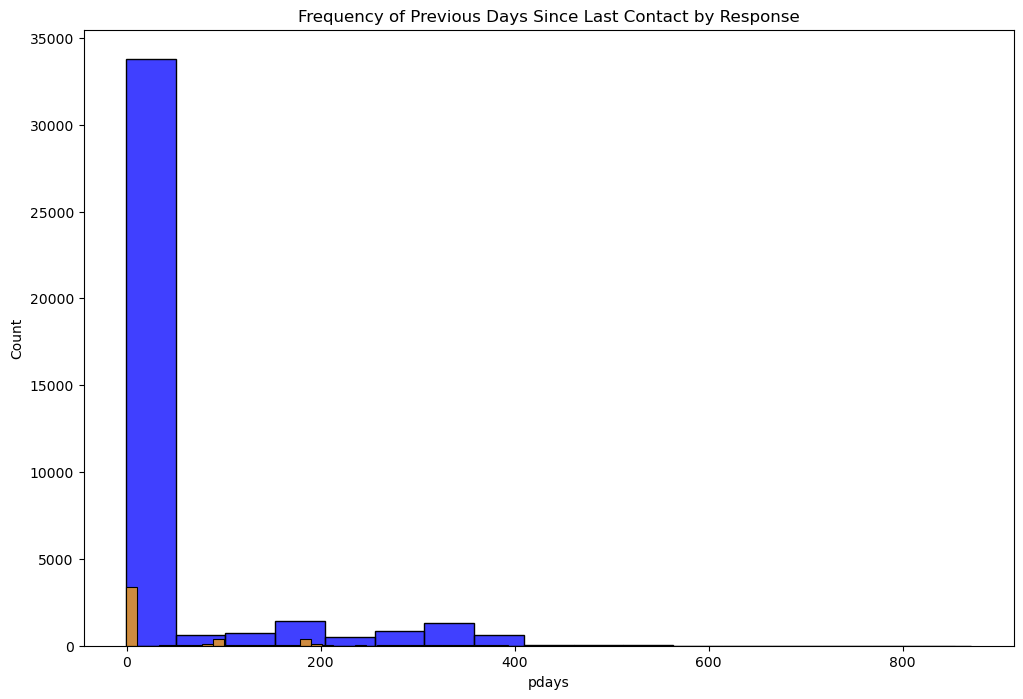

In [96]:
plt.figure(figsize=[12, 8])
sns.histplot(data=df[df['y'] == 'no'], x='pdays', color='blue')
sns.histplot(data=df[df['y'] == 'yes'], x='pdays', color='orange')

plt.title("Frequency of Previous Days Since Last Contact by Response")
plt.xlabel('pdays')
plt.ylabel('Count')

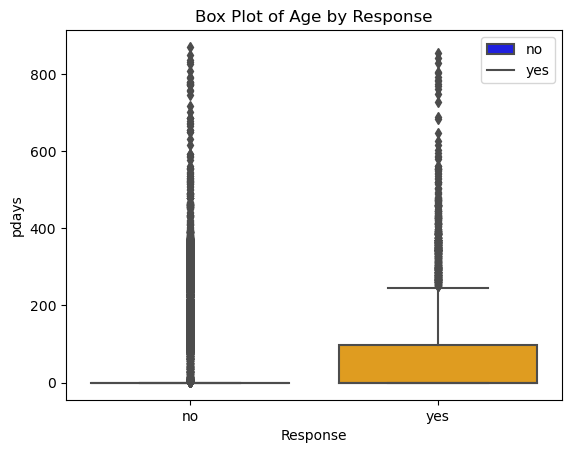

In [20]:
sns.boxplot(x='y', y='pdays', data=df,palette=['blue','orange'])

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('pdays')
plt.title('Box Plot of Age by Response')
plt.legend(labels=['no','yes'])
# Displaying the plot
plt.show()

## Previous

In [21]:
df['previous'].max()

275

Text(0, 0.5, 'Count')

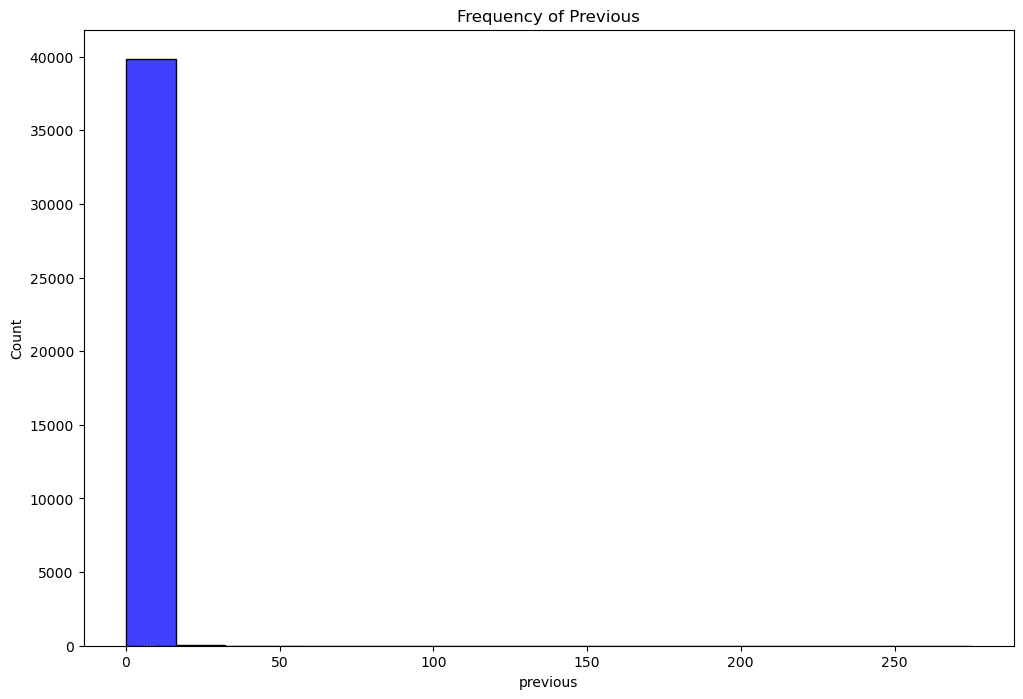

In [22]:
plt.figure(figsize=[12, 8])
sns.histplot(data=df[df['y'] == 'no'], x='previous', color='blue')
sns.histplot(data=df[df['y'] == 'yes'], x='previous', color='orange')

plt.title('Frequency of Previous')
plt.xlabel('previous')
plt.ylabel('Count')

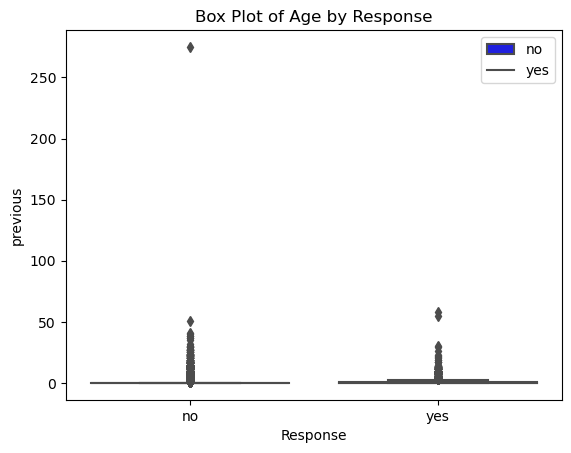

In [23]:
sns.boxplot(x='y', y='previous', data=df,palette=['blue','orange'])

# Adding labels and title
plt.xlabel('Response')
plt.ylabel('previous')
plt.title('Box Plot of Age by Response')
plt.legend(labels=['no','yes'])
# Displaying the plot
plt.show()

# Categorical values

In [24]:
 (df['job'].value_counts(normalize=True)['unknown']) * 100

0.6370131162770122

## Job

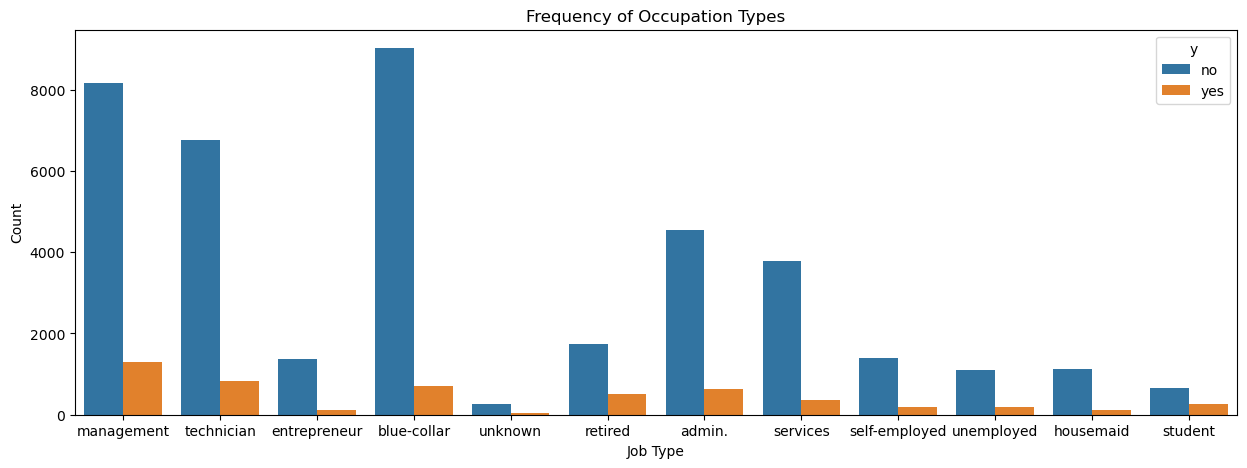

In [97]:
plt.figure(figsize=[15, 5])

sns.countplot(x='job', hue='y', data=df)

# Add a title and labels
plt.title("Frequency of Occupation Types")
plt.xlabel('Job Type')
plt.ylabel('Count')

# Display the plot
plt.show()

## Marital status

Text(0.5, 1.0, 'Frequency of Marital Status')

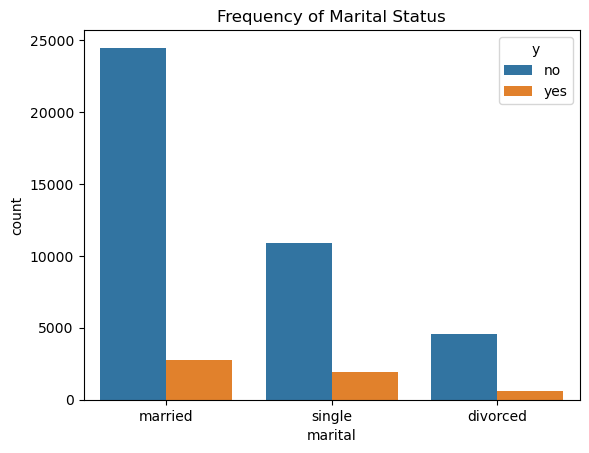

In [98]:
sns.countplot(x='marital',hue='y',data=df)
plt.title( "Frequency of Marital Status")

## Education level

In [27]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [28]:
 (df['education'].value_counts(normalize=True)['unknown']) * 100

4.1074074893278185

Text(0, 0.5, 'Count')

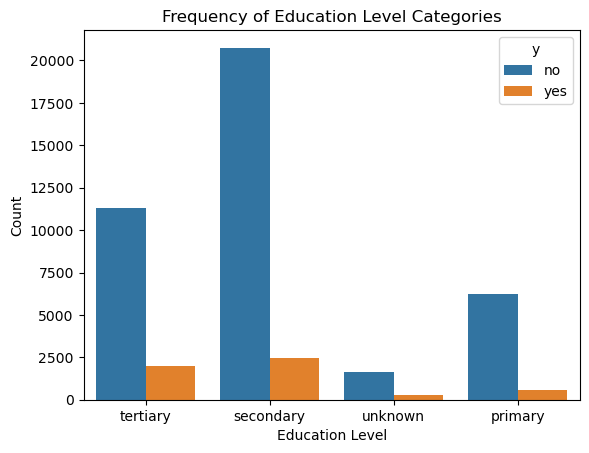

In [29]:
sns.countplot(x='education',hue='y',data=df)
plt.title('Frequency of Education Level Categories')
plt.xlabel('Education Level')
plt.ylabel('Count')

## Defaulter

Text(0, 0.5, 'Count')

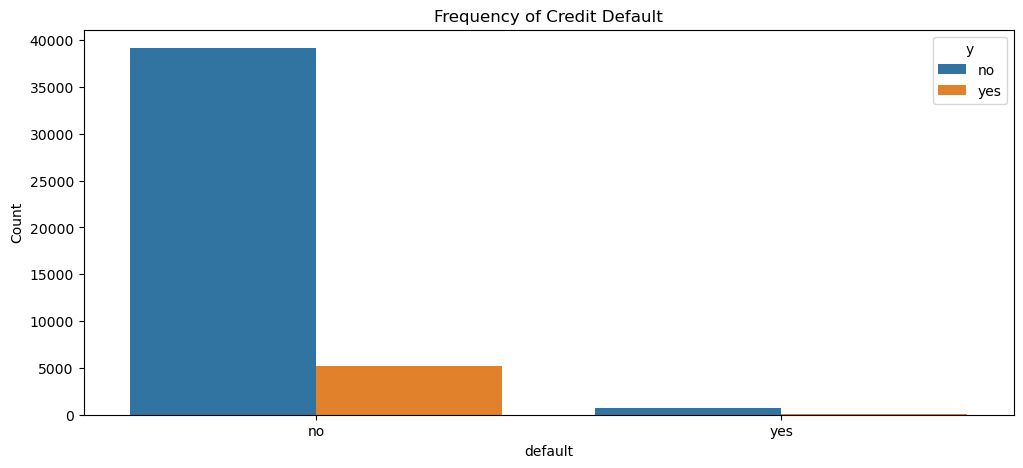

In [99]:
plt.figure(figsize=[12, 5])
sns.countplot(x='default',hue='y',data=df)
plt.title( "Frequency of Credit Default")
plt.ylabel('Count')

## Housing

Text(0, 0.5, 'Count')

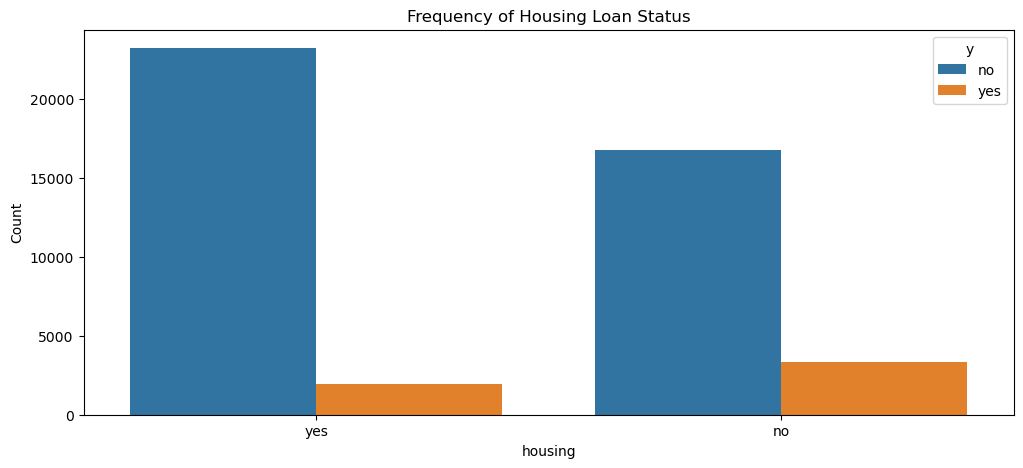

In [100]:
plt.figure(figsize=[12, 5])
sns.countplot(x='housing',hue='y',data=df)
plt.title("Frequency of Housing Loan Status")
plt.ylabel('Count')

## Loan

Text(0, 0.5, 'Count')

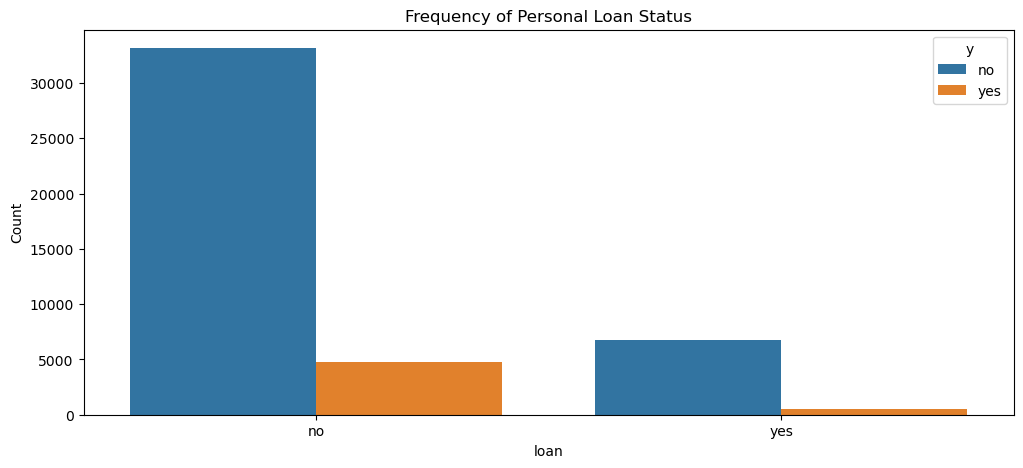

In [102]:
plt.figure(figsize=[12, 5])
sns.countplot(x='loan',hue='y',data=df)
plt.title( "Frequency of Personal Loan Status")
plt.ylabel('Count')

## Contact

In [33]:
df['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [34]:
 (df['contact'].value_counts(normalize=True)['cellular']) * 100

64.77405941032049

In [35]:
 (df['contact'].value_counts(normalize=True)['unknown']) * 100

28.798301298356595

Text(0, 0.5, 'Count')

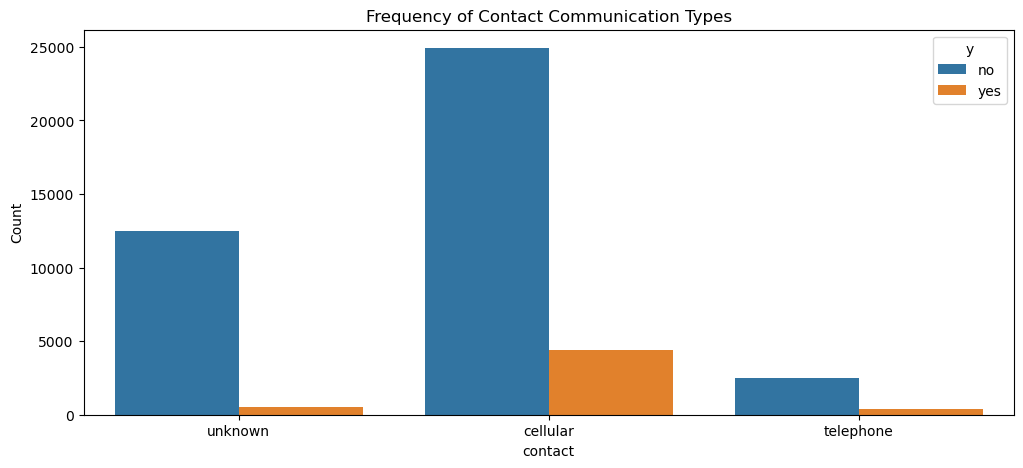

In [103]:
plt.figure(figsize=[12, 5])
sns.countplot(x='contact',hue='y',data=df)
plt.title( "Frequency of Contact Communication Types")
plt.ylabel('Count')

## Day

Text(0, 0.5, 'Count')

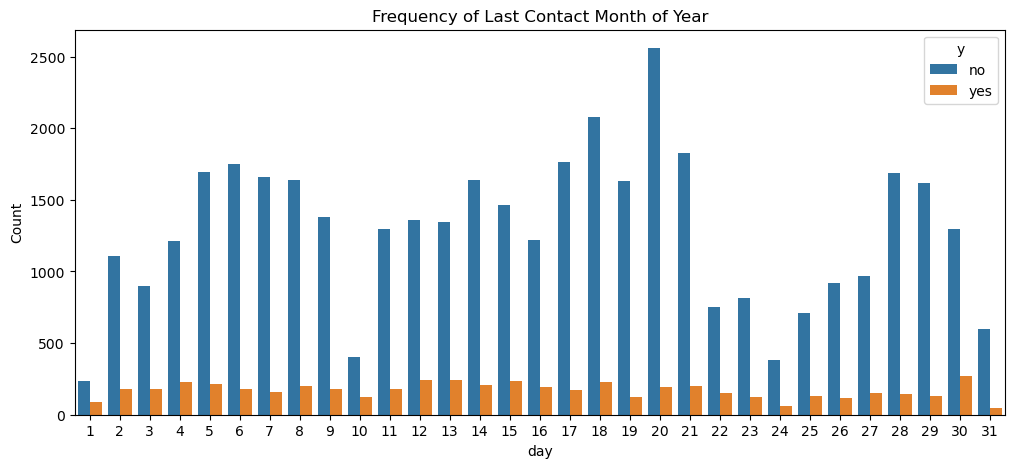

In [104]:
plt.figure(figsize=[12, 5])
sns.countplot(x='day',hue='y',data=df)
plt.title("Frequency of Last Contact Month of Year")
plt.ylabel('Count')

## Month

Text(0, 0.5, 'Count')

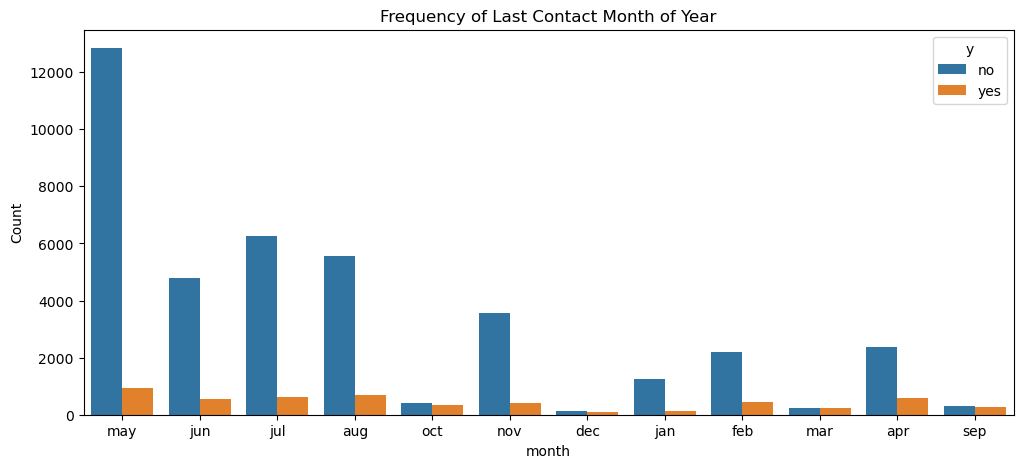

In [105]:
plt.figure(figsize=[12, 5])
sns.countplot(x='month',hue='y',data=df)
plt.title("Frequency of Last Contact Month of Year")
plt.ylabel('Count')

## poutcome

In [39]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [40]:
 (df['poutcome'].value_counts(normalize=True)['unknown']) * 100

81.74780473778506

Text(0.5, 1.0, 'Frequency of Outcome of Previous Marketing Campaign')

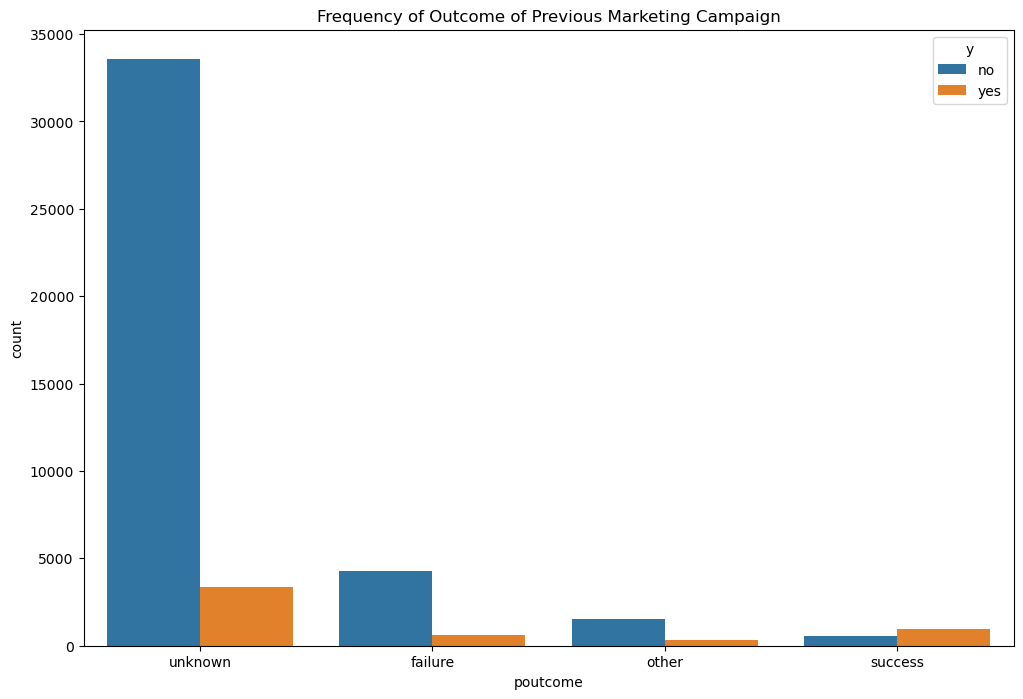

In [106]:
plt.figure(figsize=[12, 8])
sns.countplot(x='poutcome',hue='y',data=df)
plt.title("Frequency of Outcome of Previous Marketing Campaign")

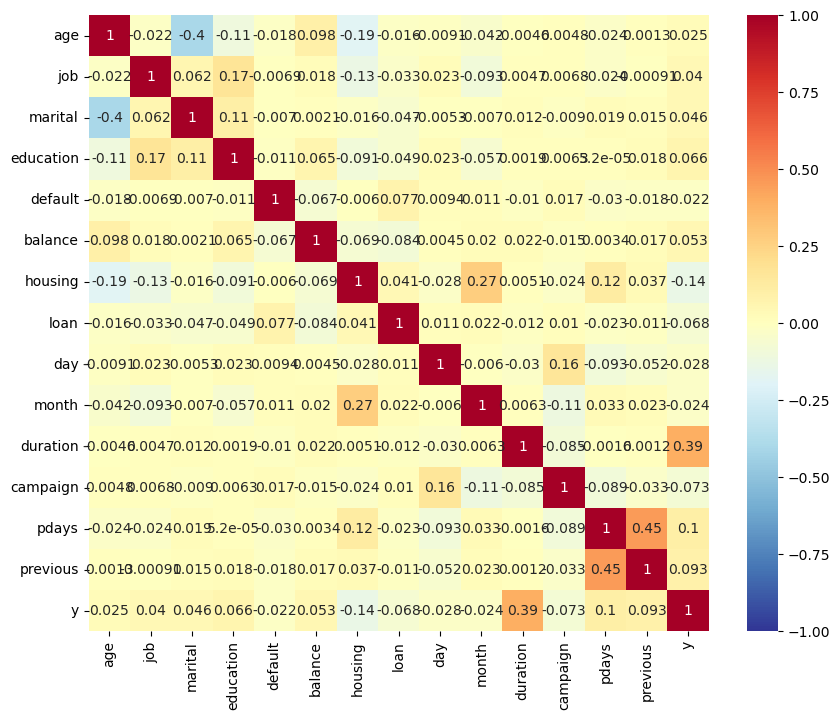

In [172]:
numeric_column_list = df.select_dtypes(include=['float', 'int'])
plt.figure(figsize=(10, 8))
plt.tight_layout()
sns.heatmap(numeric_column_list.corr(), annot=True, vmin=-1, vmax=1, cmap='RdYlBu_r')
plt.show()

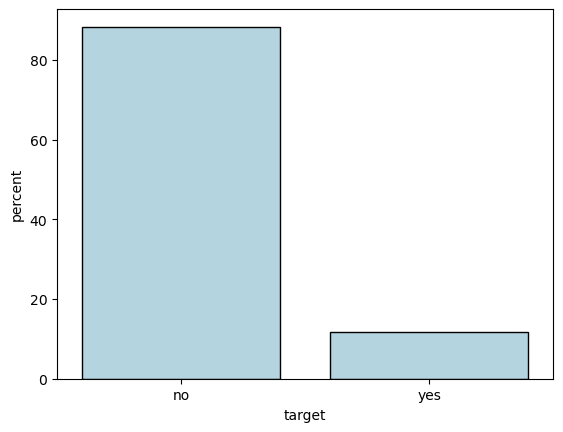

In [279]:
# Assuming 'data' is your DataFrame and 'target' is your target variable
target_counts = df.iloc[:, -1].value_counts(normalize=True) * 100

ax = sns.barplot(x=target_counts.index, y=target_counts.values, color='lightblue', edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('target')

plt.show()


In [280]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [281]:
mapping = {'no': 0, 'yes': 1}

# Map the outcome variable to numeric values
df['y'] = df['y'].map(mapping)

In [287]:
categorical_columns= ['housing','loan','default','month','job','marital','education']

In [288]:
le=LabelEncoder()
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   day        45211 non-null  int64
 9   month      45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  y          45211 non-null  int64
dtypes: int64(14)
memory usage: 4.8 MB


In [290]:
df.drop(columns='duration',inplace=True,axis=1)

KeyError: "['duration'] not found in axis"

In [295]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [296]:
se=StandardScaler()
X=se.fit_transform(X)

In [297]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=5302)

In [331]:
# Create logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model with training data
log_reg.fit(X_train, Y_train)

# Predict with test data
Y_pred_test= log_reg.predict(X_test)

fpr_test,tpr_test,_=sm.roc_curve(Y_test,Y_pred_test)
auc_test=sm.roc_auc_score(Y_test,Y_pred_test)
cm_test=sm.confusion_matrix(Y_test,Y_pred_test)
accuracy_test=sm.accuracy_score(Y_test,Y_pred_test)
recall_test=sm.recall_score(Y_test,Y_pred_test)
F1_test=sm.f1_score(Y_test,Y_pred_test)
Precision_test=sm.precision_score(Y_test,Y_pred_test)

print(' The AUC, accuracy, recall, F1, Precision: \n ', [auc_test,accuracy_test,recall_test,F1_test,Precision_test])

 The AUC, accuracy, recall, F1, Precision: 
  [0.502472600598266, 0.8835151872603951, 0.00569620253164557, 0.011264080100125156, 0.5]


# Over sampling

In [303]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

In [332]:
# Create logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model with training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict with test data
Y_pred_test= log_reg.predict(X_test)

fpr_test,tpr_test,_=sm.roc_curve(Y_test,Y_pred_test)
auc_test=sm.roc_auc_score(Y_test,Y_pred_test)
cm_test=sm.confusion_matrix(Y_test,Y_pred_test)
accuracy_test=sm.accuracy_score(Y_test,Y_pred_test)
recall_test=sm.recall_score(Y_test,Y_pred_test)
F1_test=sm.f1_score(Y_test,Y_pred_test)
Precision_test=sm.precision_score(Y_test,Y_pred_test)

print(' The AUC, accuracy, recall, F1, Precision: \n ', [auc_test,accuracy_test,recall_test,F1_test,Precision_test])

 The AUC, accuracy, recall, F1, Precision: 
  [0.640553543965794, 0.6265113535830139, 0.6588607594936708, 0.29127028539451594, 0.1869612068965517]


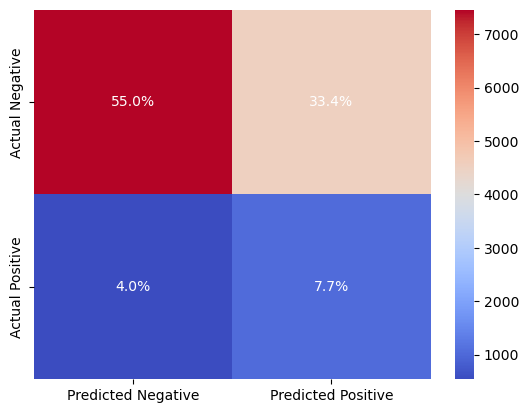

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(dpi=100)
cm1 = sklearn.metrics.confusion_matrix(Y_test,Y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)

# Create heatmap without annotations
sns.heatmap(cm1, annot=False, cmap='coolwarm')

# Manually annotate the heatmap with percentages
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.5, "{:.1%}".format(cm1[i, j] / np.sum(cm1)), ha='center', va='center', color='white')

plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])

plt.show()


In [78]:
Y_train.value_counts()

y
0    31912
1     4256
Name: count, dtype: int64

In [335]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Oversample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, Y_train_resampled)



# Make predictions on train data
Y_pred_decision_tree_train = decision_tree.predict(X_train_resampled)

# Make predictions on test data
Y_pred_decision_tree = decision_tree.predict(X_test)

# Calculate predicted probabilities  for AUC-ROC on training data
Y_prob_decision_tree_train = decision_tree.predict_proba(X_train_resampled)[:, 1]


# Calculate predicted probabilities for AUC-ROC on testing data
Y_prob_decision_tree = decision_tree.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for Decision Tree on training data
accuracy_decision_tree_train = accuracy_score(Y_train_resampled, Y_pred_decision_tree_train)
precision_decision_tree_train = precision_score(Y_train_resampled, Y_pred_decision_tree_train)
recall_decision_tree_train = recall_score(Y_train_resampled, Y_pred_decision_tree_train)
f1_decision_tree_train = f1_score(Y_train_resampled, Y_pred_decision_tree_train)
auc_roc_decision_tree_train = roc_auc_score(Y_train_resampled, Y_pred_decision_tree_train)
conf_matrix_decision_tree_train = confusion_matrix(Y_train_resampled, Y_pred_decision_tree_train)

# Calculate evaluation metrics for Decision Tree
accuracy_decision_tree = accuracy_score(Y_test, Y_pred_decision_tree)
precision_decision_tree = precision_score(Y_test, Y_pred_decision_tree)
recall_decision_tree = recall_score(Y_test, Y_pred_decision_tree)
f1_decision_tree = f1_score(Y_test, Y_pred_decision_tree)
auc_roc_decision_tree = roc_auc_score(Y_test, Y_prob_decision_tree)
conf_matrix_decision_tree = confusion_matrix(Y_test, Y_pred_decision_tree)




# Print evaluation metrics and confusion matrix for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)
print("AUC-ROC Score:", auc_roc_decision_tree)
print("Confusion Matrix:")
print(conf_matrix_decision_tree)
print()



Decision Tree Metrics:
Accuracy: 0.8105278678855795
Precision: 0.25225225225225223
Recall: 0.3189873417721519
F1 Score: 0.28172163219675794
AUC-ROC Score: 0.5971605600716567
Confusion Matrix:
[[10490  1494]
 [ 1076   504]]



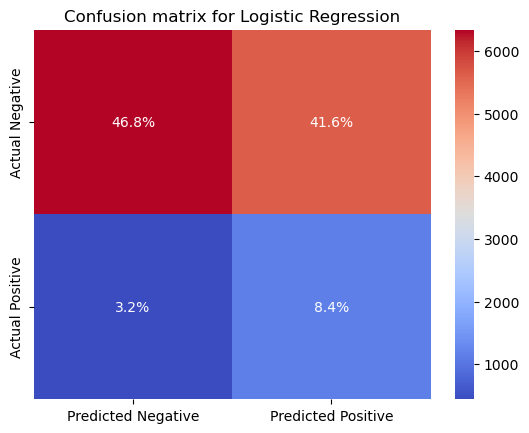

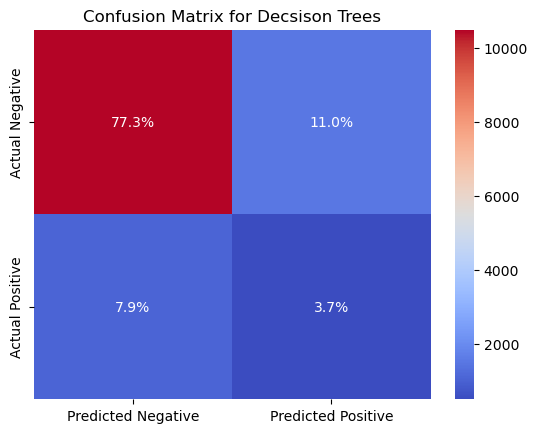

In [323]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(dpi=100)
cm1 = sklearn.metrics.confusion_matrix(Y_test,Y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)

# Create heatmap without annotations
sns.heatmap(cm1, annot=False, cmap='coolwarm')

# Manually annotate the heatmap with percentages
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.5, "{:.1%}".format(cm1[i, j] / np.sum(cm1)), ha='center', va='center', color='white')

plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion matrix for Logistic Regression')

plt.show()

import matplotlib.pyplot as plt
import seaborn as sns





import numpy as np

plt.figure(dpi=100)
cm1 = sklearn.metrics.confusion_matrix(Y_test,Y_pred_decision_tree)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)

# Create heatmap without annotations
sns.heatmap(cm1, annot=False, cmap='coolwarm')

# Manually annotate the heatmap with percentages
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.5, "{:.1%}".format(cm1[i, j] / np.sum(cm1)), ha='center', va='center', color='white')

plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Decsison Trees')
plt.show()


Accuracy: 0.6265113535830139
Confusion Matrix:
[[7457 4527]
 [ 539 1041]]


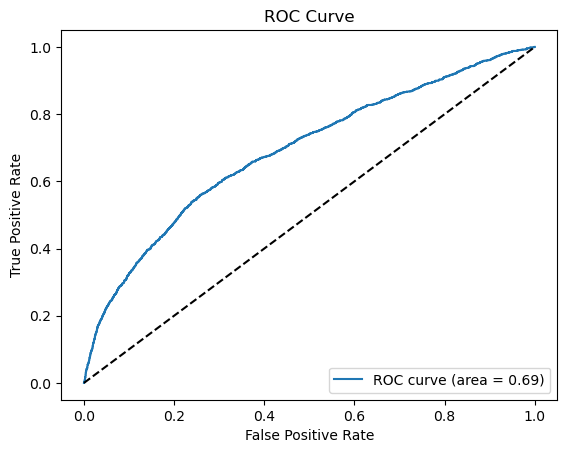

In [326]:
# Create logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model with training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict with test data
y_pred = log_reg.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)



# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
